# R-3628 : alphas

A NB template to ilustrate how to examine the features of events

In [123]:
from __future__ import print_function, division
%load_ext autoreload
%autoreload 2
import os
import operator
import functools
import textwrap
import copy
import time
import glob
import math
print("Running on ", time.asctime())

import textwrap
import numpy as np
import pandas as pd
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import invisible_cities.database.load_db as DB
import invisible_cities.core.system_of_units_c as SystemOfUnits
import invisible_cities.reco.pmaps_functions as pmapf
import invisible_cities.core.fit_functions as fitf

from invisible_cities.core.core_functions import timefunc, flat
from invisible_cities.reco.pmaps_functions import width, integrate_charge
from icaro.core.hst_functions import labels, hist, doublehist, hist2d, pdf, scatter, profile_and_scatter,\
                              doublescatter, covariance, reso, gausstext, plot_profile_histogram 

from scipy.optimize import curve_fit
from icaro.core.kdst_functions import load_dst, event_rate, profile_and_fit, print_fit, chi2
DataPMT = DB.DataPMT()
DataSiPM = DB.DataSiPM()
units = SystemOfUnits.SystemOfUnits()
pi = np.pi



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on  Thu Apr 13 18:55:46 2017


In [50]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-04-13 17:52:52


In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
import os
import time
import tables as tb
import numpy as np
import matplotlib.pyplot as plt

In [53]:
from invisible_cities.database import load_db

In [54]:
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units

In [55]:
from invisible_cities.core.mpl_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, \
              plot_signal_vs_time_mus

In [106]:
from invisible_cities.reco.pmaps_functions import plot_s12
from invisible_cities.core.core_functions import in_range

In [57]:
from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si

In [58]:
from icaro.core.hst_functions import labels, hist, doublehist, hist2d, pdf, scatter, profile_and_scatter,\
                              doublescatter, covariance, reso, gausstext, plot_profile_histogram 
from icaro.core.kdst_functions import load_dst, event_rate, profile_and_fit, print_fit, chi2

In [59]:
import glob

In [60]:
def plot_options(figsize=(6,6), fontsize=15):
    plt.rcParams["figure.figsize"]          = figsize
    plt.rcParams["font.size"]               = fontsize
    plt.rcParams["figure.max_open_warning"] = 100

In [61]:
plt.rcParams["figure.figsize"]          = 6, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"

### Run Parameters

In [9]:
run_number = 3628

In [10]:
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values

In [20]:
   
input_dir = os.path.join(os.environ['IC_DATA'],
                'LSC/wvfms/{}'.format(run_number))
files_in = glob.glob(os.path.join(input_dir,'*.h5'))
files_in.sort()


In [21]:
files_in

['/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.000.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.001.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.002.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.003.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.100.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.101.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.102.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.103.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.120.rd_3628.root.h5',
 '/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.

In [32]:
files_in = ['/Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.000.rd_3628.root.h5']

In [22]:
s1par  = S12Params(tmin=0*units.mus, tmax=649*units.mus, lmin=5, lmax=30, stride=4, rebin=False)
s2par = S12Params(tmin=649*units.mus, tmax=700*units.mus, stride=80, lmin=80, lmax=20000, rebin=True)
thr    = ThresholdParams(thr_s1=5 * units.pes,  thr_s2=3 *units.pes,
                        thr_MAU = 3 * units.adc, thr_sipm = 3.5 * units.pes,
                        thr_SIPM = 30 * units.adc)

In [24]:
epm = EventPmaps(run_number, s1par, s2par, thr, verbose=False)

In [25]:
S1F = []
S2F = []
printout = 10
for filename in files_in:
    print("Opening", filename, end="... ")
    
    with tb.open_file(filename, "r") as h5in:
        pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5in)
        NEVT, NPMT, PMTWL = pmtrwf.shape
        NEVT, NSIPM, SIPMWL = sipmrwf.shape
        print("""
        Number of events in file = {}
        Number of PMTs = {}
        PMTWL = {}
        Number of SiPMs = {}
        SiPMWL = {}
      """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))
        
        for event in range(NEVT):
            if event%printout == 0:
                print('event = {}'.format(event))
            epm.calibrated_pmt_and_csum(event, pmtrwf)
            
            epm.find_s1()
            if len (epm.S1) != 1:
                print('S1 != 1')
                continue
    
            epm.find_s2()
            if len (epm.S2) != 1:
                print('S2 != 1')
                continue
            
            s1f = epm.s1f[0]
            s2f = epm.s2f[0]
            S1F.append(s1f)
            S2F.append(s2f)
            
    

Opening /Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.000.rd_3628.root.h5... 
        Number of events in file = 82
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      
event = 0
S1 != 1
S1 != 1
event = 10
S1 != 1
S1 != 1
event = 20
S1 != 1
S1 != 1
event = 30
S1 != 1
S1 != 1
event = 40
S1 != 1
S1 != 1
S1 != 1
event = 50
S1 != 1
S1 != 1
event = 60
S1 != 1
S1 != 1
S1 != 1
S1 != 1
event = 70
S2 != 1
S1 != 1
S1 != 1
S1 != 1
event = 80
Opening /Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.001.rd_3628.root.h5... 
        Number of events in file = 82
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      
event = 0
S1 != 1
event = 10
S1 != 1
event = 20
S1 != 1
S1 != 1
S1 != 1
S1 != 1
event = 30
S1 != 1
S1 != 1
event = 40
S1 != 1
S1 != 1
event = 50
S1 != 1
event = 60
S1 != 1
event = 70
S1 != 1
S1 != 1
event = 80
Open

In [38]:
DT = []
ES1 = []
ES2 = []
for s1f, s2f in zip(S1F, S2F):
    ES1.append(s1f.etot)
    ES2.append(s2f.etot)
    dt = (s2f.tpeak - s1f.tpeak)/units.mus
    DT.append(dt)
    

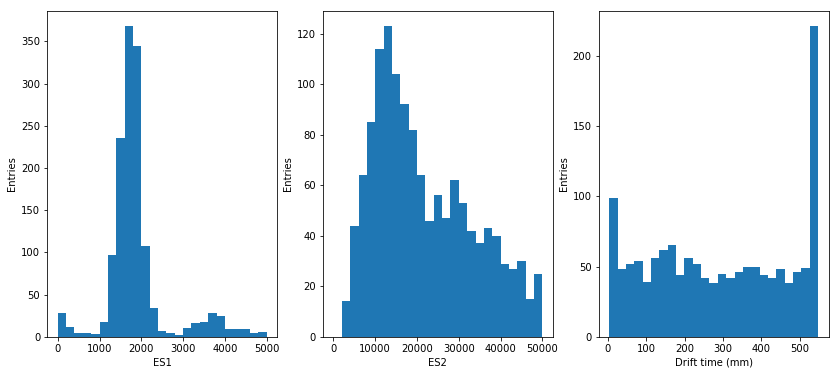

In [39]:
figsize=(14,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
plt.hist(ES1, 25, (0,5000))
labels("ES1", "Entries")

ax = plt.subplot(1, 3, 2)
plt.hist(ES2, 25, (0,50000))
labels("ES2", "Entries")
ax = plt.subplot(1, 3, 3)
plt.hist(DT, 25)
labels("Drift time (mm)", "Entries")


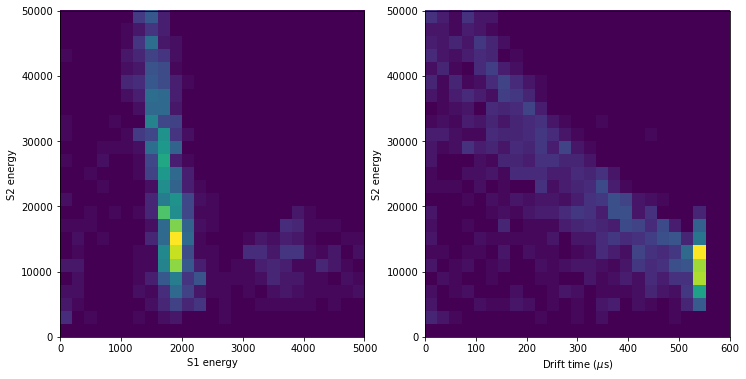

In [40]:
zrange =   0, 600
S1range = 0, 5e3
S2range = 0, 50e3

figsize=(12,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 2, 1)
plt.hist2d(ES1, ES2, (25, 25), range=(S1range, S2range))
labels("S1 energy", "S2 energy")

ax = plt.subplot(1, 2, 2)
plt.hist2d(DT, ES2, (25, 25), range=(zrange, S2range))
labels("Drift time ($\mu$s)", "S2 energy")


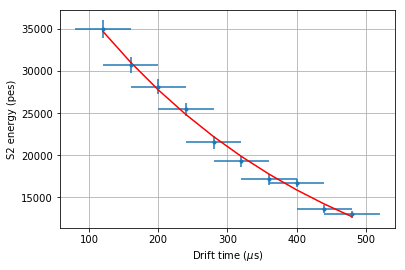

In [47]:
zrange =   100, 500
Erange = 1e+3, 50e3
nbins = 10
F, x, y, sy = profile_and_fit(np.array(DT), np.array(ES2), 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=10, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))


In [48]:
print_fit(F)
print('chi2 = {}'.format(chi2(F, x, y, sy)))

fit par[0] = 48468.05029982699 error = 1408.1746310097997
fit par[1] = -358.88835132790206 error = 11.821086334669838
degrees of freedom = 2
chi2 = 1.053130028006136


In [62]:
ifile = os.path.join(os.environ['IC_DATA'],
                        'LSC/kdst/{}/kdst_3628_1.h5'.format(run_number))
print("ifile:", ifile)

ifile: /Users/jjgomezcadenas/Projects/ICDATA/LSC/kdst/3628/kdst_3628_1.h5


In [63]:
full = load_dst(ifile)
print(len(full))
full.head()

107809


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,1,1.492019e+09,0,1,325.0,343.339508,1969.230554,391325.0,10.200625,3764.766357,...,655137.5,13,263.8125,263.8125,-187.462929,30.724923,189.964130,2.979138,8.080248,8.996847
1,2,1.492019e+09,0,1,350.0,251.357895,1460.681752,552300.0,8.812500,9603.205078,...,654512.5,18,102.2125,102.2125,85.196690,-55.503263,101.681306,-0.577409,8.714130,8.527614
2,3,1.492019e+09,0,1,300.0,248.654160,1424.480923,611050.0,6.043062,17420.824219,...,653562.5,18,42.5125,42.5125,-85.594098,39.492259,94.265520,2.709307,8.428040,8.456854
3,4,1.492019e+09,0,1,300.0,306.161346,1722.519528,474000.0,9.955813,7857.233887,...,655162.5,16,181.1625,181.1625,-142.918068,8.641987,143.179112,3.081198,9.182113,8.241882
4,5,1.492019e+09,0,1,350.0,325.086487,1965.504873,321875.0,10.871688,4010.353027,...,655487.5,11,333.6125,333.6125,2.453711,-124.440975,124.465164,-1.551081,8.089127,7.935277


In [64]:
len(full)

107809

In [65]:
r = event_rate(full)

In [66]:
print("Trigger rate: {} evts/s".format(r))

Trigger rate: 3.5360309182054275 evts/s


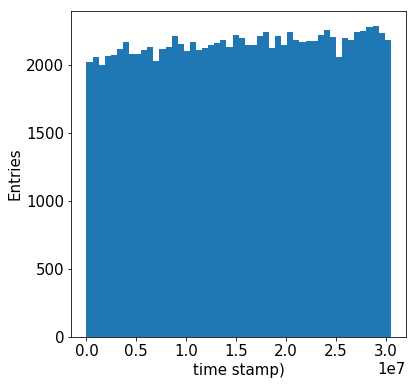

In [91]:
hist(1e+3*(full.time - full.time[0]), 50)
labels("time stamp)", "Entries")

In [86]:
print(1e+3*(full.time[0:10] - full.time[0]))

0       0.000000
1     160.000086
2     466.000080
3     621.999979
4     980.999947
5    1220.000029
6    1519.999981
7    1832.000017
8    2244.999886
9    2361.999989
Name: time, dtype: float64


In [95]:
print(1e+3*(full.time[10000] - full.time[0]))

2990967.00001


In [96]:
len(full.time)

107809

In [110]:
len(full.time)/10

10780.9

In [111]:
10780*10

107800

In [100]:
full.time.index[-1]

107808

In [113]:
indx = 10780

In [114]:
indx*10

107800

In [133]:
import datetime
st = datetime.datetime.fromtimestamp(full.time[0]).strftime('%Y-%m-%d %H:%M:%S')

In [134]:
print(st)

2017-04-12 19:39:51


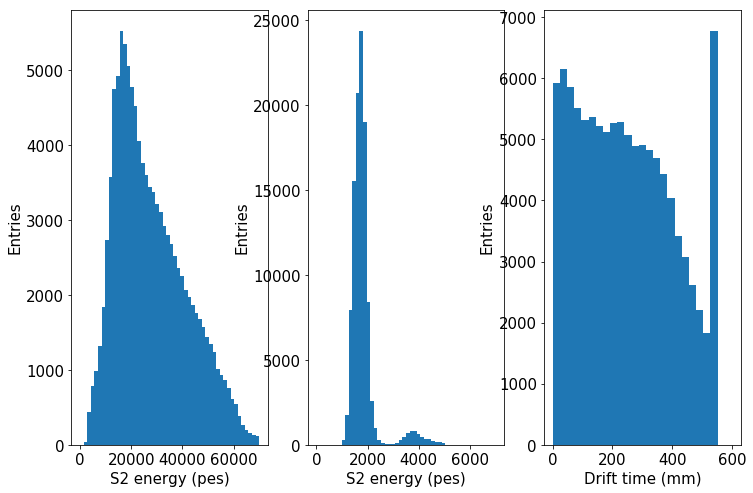

In [75]:
figsize=(12,8)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
plt.hist(full.S2e, 50, (0e3,7e4))
labels("S2 energy (pes)", "Entries")

ax = plt.subplot(1, 3, 2)
plt.hist(full.S1e, 50, (0e3,7e3))
labels("S2 energy (pes)", "Entries")

ax = plt.subplot(1, 3, 3)
plt.hist(full.Z, 25, (0,600))
labels("Drift time (mm)", "Entries")


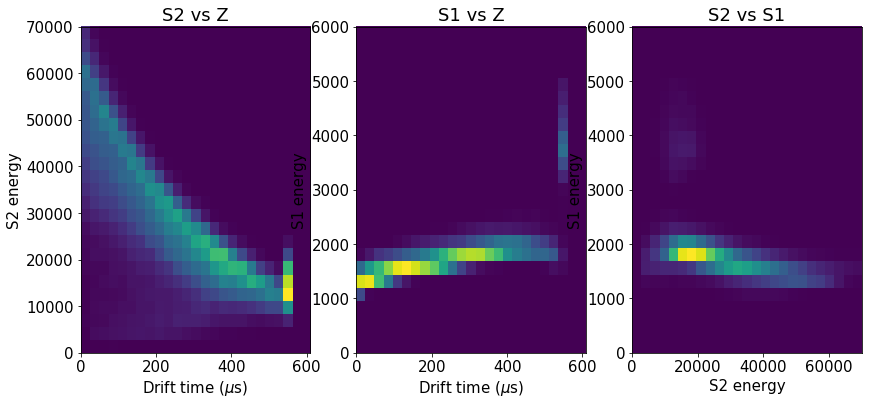

In [79]:
zrange =   0, 610
S2range = 0, 7e4
S1range = 0, 6e3

figsize=(14,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 3, 1)
plt.hist2d(full.Z, full.S2e, (25, 25), range=(zrange, S2range))
labels("Drift time ($\mu$s)", "S2 energy")
plt.title('S2 vs Z')

ax = plt.subplot(1, 3, 2)
plt.hist2d(full.Z, full.S1e, (25, 25), range=(zrange, S1range))
labels("Drift time ($\mu$s)", "S1 energy")
plt.title('S1 vs Z')

ax = plt.subplot(1, 3, 3)
plt.hist2d(full.S2e, full.S1e, (25, 25), range=(S2range, S1range))
labels("S2 energy", "S1 energy")
plt.title('S2 vs S1')



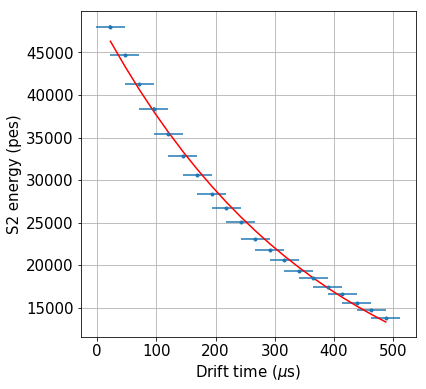

In [80]:
zrange =   10, 500
Erange = 1e+3, 70e3
nbins = 20
F, x, y, sy = profile_and_fit(full.Z, full.S2e, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))



In [81]:
print_fit(F)
print('chi2 = {}'.format(chi2(F, x, y, sy)))

fit par[0] = 49159.07982595513 error = 591.2376953842685
fit par[1] = -373.4168155036262 error = 5.8162723166828085
degrees of freedom = 2
chi2 = 6.612805751164075


### But chi2 may suggest that there is more than one exponential

 fit over events between 0 and 10780
Ratio wrt full: 0.09999165190290235
fit par[0] = 48154.49937139782 error = 785.4129080430823
fit par[1] = -384.95605832848236 error = 8.2353504976617
degrees of freedom = 2
chi2 = 2.8272494918228865
 fit over events between 10780 and 21560
Ratio wrt full: 0.09999165190290235
fit par[0] = 49494.605411108336 error = 962.5865727819363
fit par[1] = -363.4708285774276 error = 8.808957274332508
degrees of freedom = 2
chi2 = 3.4743669860597284
 fit over events between 21560 and 32340
Ratio wrt full: 0.09999165190290235
fit par[0] = 50367.7876317292 error = 867.9920500527875
fit par[1] = -353.2069275140037 error = 7.417174984121499
degrees of freedom = 2
chi2 = 3.192213686449698
 fit over events between 32340 and 43120
Ratio wrt full: 0.09999165190290235
fit par[0] = 49716.78322138189 error = 896.21617829454
fit par[1] = -358.9856993301428 error = 7.860867451452013
degrees of freedom = 2
chi2 = 3.3502565639056265
 fit over events between 43120 and 53900
Rat

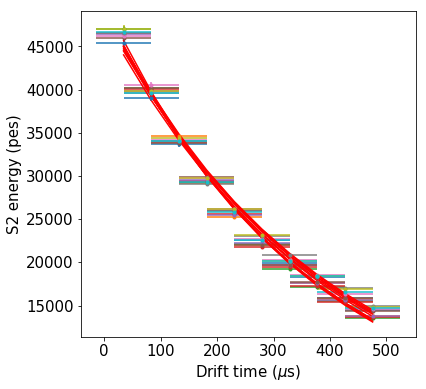

In [116]:
zrange =   10, 500
Erange = 1e+3, 70e3
nbins = 10


for i in range(10):
    k0 = i * indx
    k = (i+1) * indx
    print(' fit over events between {} and {}'.format(k0, k))
    tleg = full[in_range(full.time.index, minval=k0, maxval=k)]
    print("Ratio wrt full:", len(tleg)/len(full))
    F, x, y, sy = profile_and_fit(tleg.Z, tleg.S2e, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))
    print_fit(F)
    print('chi2 = {}'.format(chi2(F, x, y, sy)))





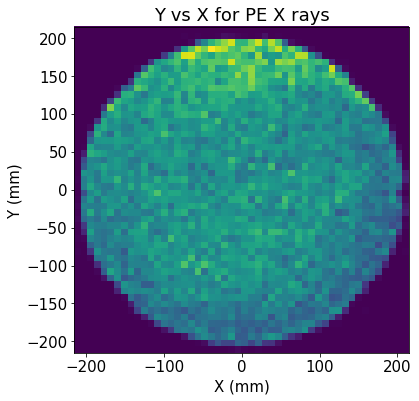

In [152]:
xrange = -215, 215
yrange = -215, 215

figsize=(6,6)
plt.figure(figsize=figsize)
ax = plt.subplot(1, 1, 1)
plt.hist2d(full.X, full.Y, (50, 50), range=(xrange, yrange))
labels("X (mm)", "Y (mm)")
plt.title('Y vs X for PE X rays')




In [119]:
fid = full[full.R < 100]
print("Ratio wrt full:", len(fid)/len(full))

Ratio wrt full: 0.24605552412136278


 fit over events between 0 and 10780
Ratio wrt full: 0.02504429129293473
time = 2017-04-12 19:39:51
fit par[0] = 62954.54616384134 error = 413.67718294080174
fit par[1] = -352.81673624167047 error = 3.110757008816002
degrees of freedom = 2
chi2 = 2.030148912575801
 fit over events between 10780 and 21560
Ratio wrt full: 0.024302238217588513
time = 2017-04-12 19:39:51
fit par[0] = 64175.455114486955 error = 218.3125664588157
fit par[1] = -336.6018389804167 error = 1.4521354286790784
degrees of freedom = 2
chi2 = 0.9607665876050824
 fit over events between 21560 and 32340
Ratio wrt full: 0.024858778024098173
time = 2017-04-12 20:33:19
fit par[0] = 64407.25089383228 error = 150.8791331527354
fit par[1] = -332.0310852533052 error = 1.0110021050476183
degrees of freedom = 2
chi2 = 0.5928049115780236
 fit over events between 32340 and 43120
Ratio wrt full: 0.0244320975057741
time = 2017-04-12 21:25:27
fit par[0] = 64382.13150596266 error = 243.0384298947344
fit par[1] = -333.2947905502253 er

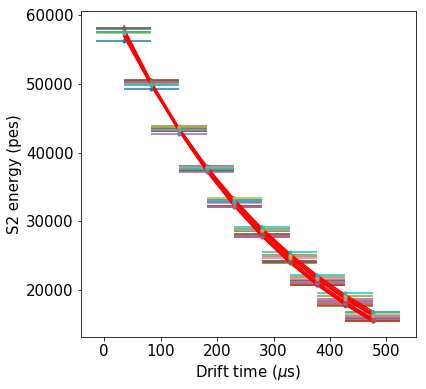

In [135]:
zrange =   10, 500
Erange = 1e+3, 70e3
nbins = 10
CHI2 = []
LAMBDA = []
ELAMBDA = []
TSTAMP = []

st = datetime.datetime.fromtimestamp(full.time[0]).strftime('%Y-%m-%d %H:%M:%S')

for i in range(10):
    k0 = i * indx
    k = (i+1) * indx
    print(' fit over events between {} and {}'.format(k0, k))
    tleg = fid[in_range(fid.time.index, minval=k0, maxval=k)]
    print("Ratio wrt full:", len(tleg)/len(full))
    F, x, y, sy = profile_and_fit(tleg.Z, tleg.S2e, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))
    
    print('time = {}'.format(st))
    print_fit(F)
    chi = chi2(F, x, y, sy)
    CHI2.append(chi)
    LAMBDA.append(F.values[1])
    ELAMBDA.append(F.errors[1])
    st = datetime.datetime.fromtimestamp(full.time[k0]).strftime('%Y-%m-%d %H:%M:%S')
    TSTAMP.append(st)
    print('chi2 = {}'.format(chi))



In [127]:
plot_options()

In [136]:
TSTAMP

['2017-04-12 19:39:51',
 '2017-04-12 20:33:19',
 '2017-04-12 21:25:27',
 '2017-04-12 22:17:02',
 '2017-04-12 23:08:24',
 '2017-04-12 23:58:44',
 '2017-04-13 00:49:05',
 '2017-04-13 01:38:59',
 '2017-04-13 02:28:58',
 '2017-04-13 03:19:05']

In [227]:
x = [datetime.datetime.strptime(elem, '%Y-%m-%d %H:%M:%S') for elem in TSTAMP]

In [228]:
x

[datetime.datetime(2017, 4, 12, 19, 39, 51),
 datetime.datetime(2017, 4, 12, 20, 33, 19),
 datetime.datetime(2017, 4, 12, 21, 25, 27),
 datetime.datetime(2017, 4, 12, 22, 17, 2),
 datetime.datetime(2017, 4, 12, 23, 8, 24),
 datetime.datetime(2017, 4, 12, 23, 58, 44),
 datetime.datetime(2017, 4, 13, 0, 49, 5),
 datetime.datetime(2017, 4, 13, 1, 38, 59),
 datetime.datetime(2017, 4, 13, 2, 28, 58),
 datetime.datetime(2017, 4, 13, 3, 19, 5)]

<Container object of 3 artists>

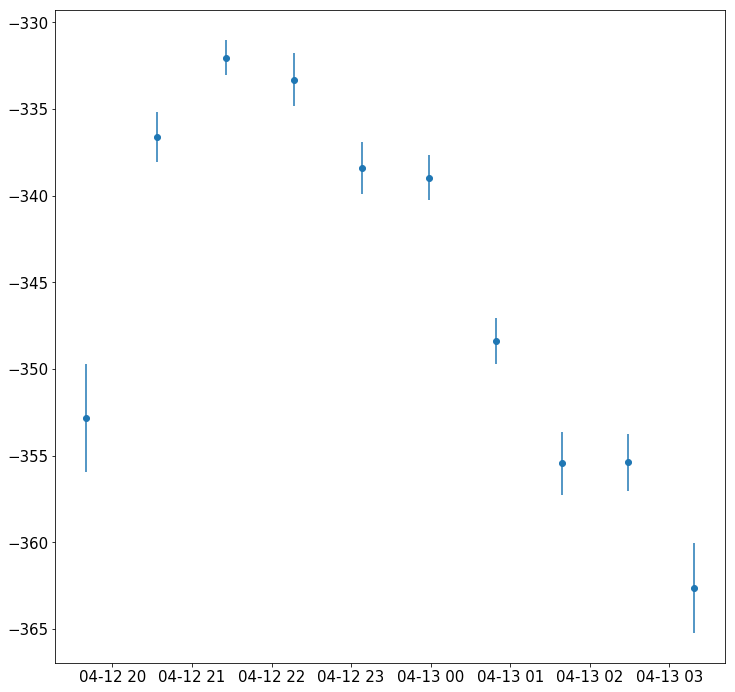

In [229]:
figsize=(12,12)
plt.figure(figsize=figsize)
plt.errorbar(x, LAMBDA, yerr=ELAMBDA, linestyle='none', fmt='o')

fit par[0] = 60436.42611262694 error = 96.19711117287731
fit par[1] = -346.6788544866714 error = 0.7533129941916434
degrees of freedom = 2
chi2 = 1.5057973025457132


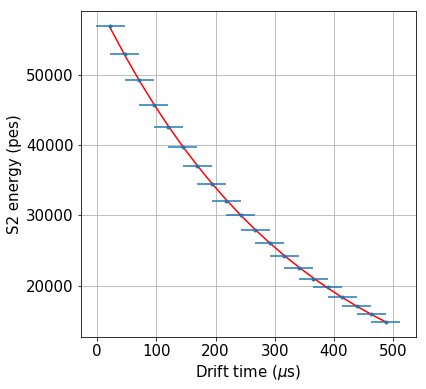

In [230]:
zrange =   10, 500
Erange = 1e+3, 70e3
nbins = 20
F, z, E, Ee = profile_and_fit(fid.Z, fid.S2e, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))
print_fit(F)
chi = chi2(F, z, E, Ee)
print('chi2 = {}'.format(chi))

In [231]:
zfun  = F.fn
zmin  = np.min(z)
zcorr = lambda z: zfun(zmin)/zfun(z)

In [232]:
Erange = 1e+3, 70e3
Ez = full.S2e * zcorr(full.Z)
Ezf = fid.S2e * zcorr(fid.Z)

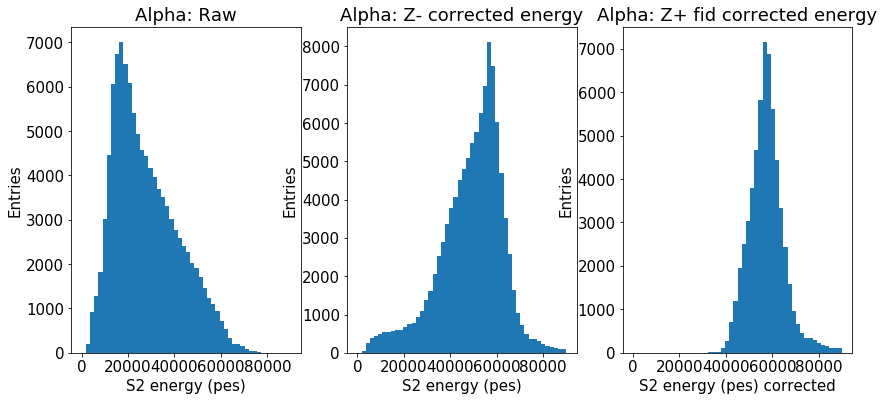

In [233]:
figsize=(14,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 3, 1)
plt.hist(full.S2e, 50, (0e3,9e4))
labels("S2 energy (pes)", "Entries")
plt.title('Alpha: Raw')

ax = plt.subplot(1, 3, 2)
plt.hist(Ez, 50, (0e3,9e4))
labels("S2 energy (pes)", "Entries")
plt.title('Alpha: Z- corrected energy')

ax = plt.subplot(1, 3, 3)
plt.hist(Ezf, 50, (0e3,9e4))
labels("S2 energy (pes) corrected", "Entries")
plt.title('Alpha: Z+ fid corrected energy')


### Radial dependence

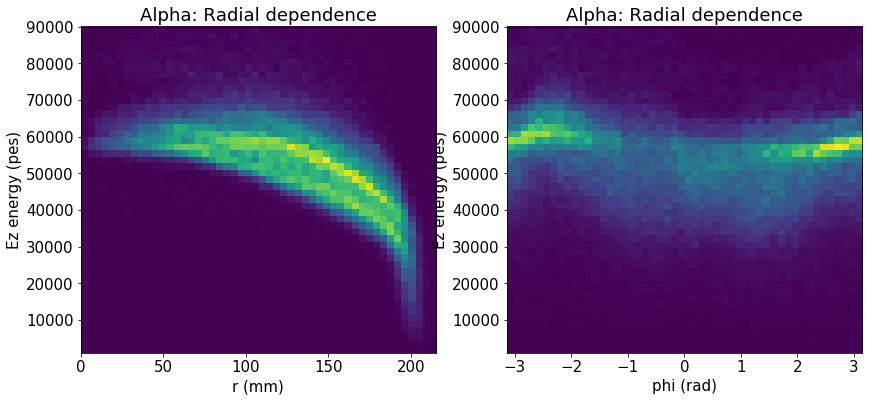

In [234]:
rrange =   0, 215
prange =   -pi, pi
Erange = 1e+3, 90e3
nbins = 50
figsize=(14,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 2, 1)
plt.hist2d(full.R, Ez, (nbins, nbins), range=(rrange, Erange), weights=Ez)
labels("r (mm)", "Ez energy (pes)")
plt.title('Alpha: Radial dependence')

ax = plt.subplot(1, 2, 2)
plt.hist2d(full.Phi, Ez, (nbins, nbins), range=(prange, Erange), weights=Ez)
labels("phi (rad)", "Ez energy (pes)")
plt.title('Alpha: Radial dependence')

#x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
#plt.plot(x, y, profOpt)


In [235]:
xrange = -215, 215
yrange = -215, 215
Erange = 1e+3, 90e3
nbins = (50,50)
x, y, E, Ee = fitf.profileXY(full.X, full.Y, Ez, *nbins, xrange=xrange, yrange=yrange)


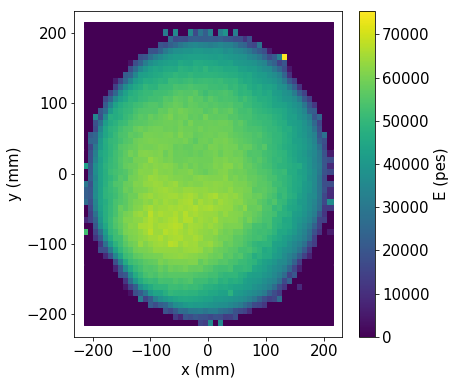

In [236]:
x_ = np.repeat(x, x.size)
y_ = np.tile  (y, y.size)
E_ = E.flatten()
plt.scatter(x_, y_, c=E_, marker="s")
cb = plt.colorbar()
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")


In [237]:
class MapXY:
    def __init__(self, x, y, E):
        self.xs = x.reshape(x.size, 1) #file to column vector
        self.ys = y.reshape(y.size, 1)
        self.eref = E[E.shape[0]//2, E.shape[1]//2]
        self.es = E
        print('reference energy = {}'.format(self.eref))
    def xycorr(self, x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x - self.xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y - self.ys))
        e = self.es[x_closest, y_closest]
        e[ e < 1e3] = self.eref
        return self.eref / e

In [238]:
mxy = MapXY(x, y, E)

reference energy = 59464.5016465774


In [239]:
Ec  = full.S2e.values * zcorr(full.Z.values) * mxy.xycorr(full.X.values, full.Y.values)

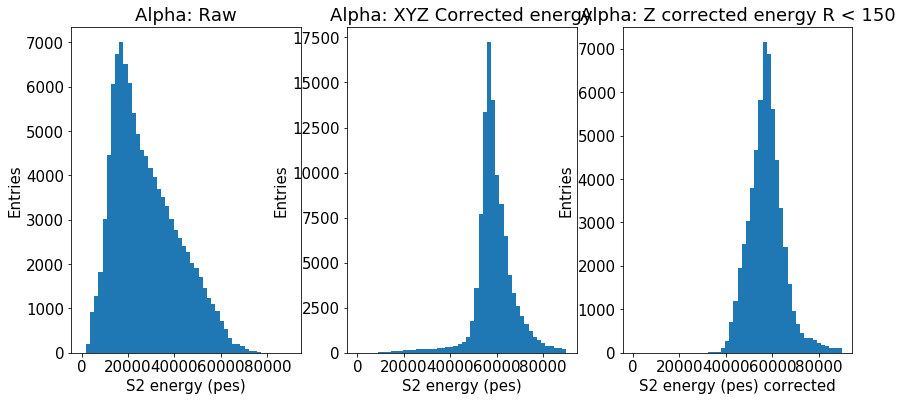

In [240]:
figsize=(14,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 3, 1)
plt.hist(full.S2e, 50, (0e3,9e4))
labels("S2 energy (pes)", "Entries")
plt.title('Alpha: Raw')

ax = plt.subplot(1, 3, 2)
plt.hist(Ec, 50, (0e3,9e4))
labels("S2 energy (pes)", "Entries")
plt.title('Alpha: XYZ Corrected energy')

ax = plt.subplot(1, 3, 3)
plt.hist(Ezf, 50, (0e3,9e4))
labels("S2 energy (pes) corrected", "Entries")
plt.title('Alpha: Z corrected energy R < 150')

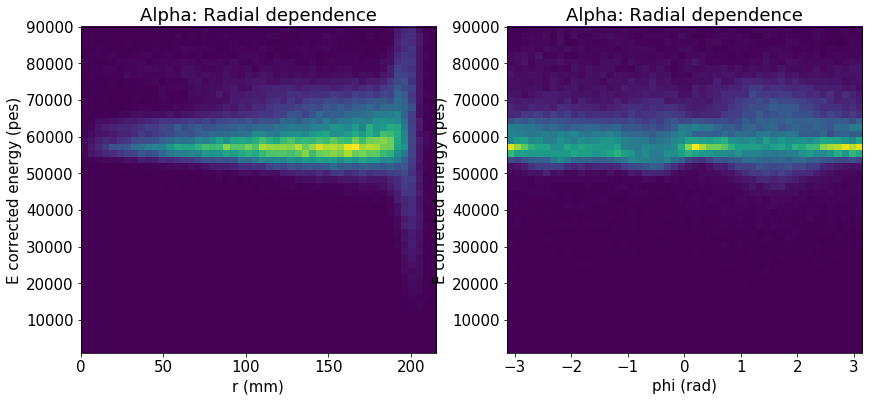

In [241]:
rrange =   0, 215
prange =   -pi, pi
Erange = 1e+3, 90e3
nbins = 50
figsize=(14,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 2, 1)
plt.hist2d(full.R, Ec, (nbins, nbins), range=(rrange, Erange), weights=Ec)
labels("r (mm)", "E corrected energy (pes)")
plt.title('Alpha: Radial dependence')

ax = plt.subplot(1, 2, 2)
plt.hist2d(full.Phi, Ec, (nbins, nbins), range=(prange, Erange), weights=Ec)
labels("phi (rad)", "E corrected energy (pes)")
plt.title('Alpha: Radial dependence')

In [242]:
fidx =  full[in_range(full.X, -150, 150)]
fidxy =  fidx[in_range(fidx.Y, -150, 150)]
print("Ratio wrt full:", len(fidxy)/len(full))

Ratio wrt full: 0.693021918392713


In [243]:
xrange = -150, 150
yrange = -150, 150
Erange = 1e+3, 90e3
nbins = (50,50)
x, y, E, Ee = fitf.profileXY(full.X, full.Y, Ez, *nbins, xrange=xrange, yrange=yrange)

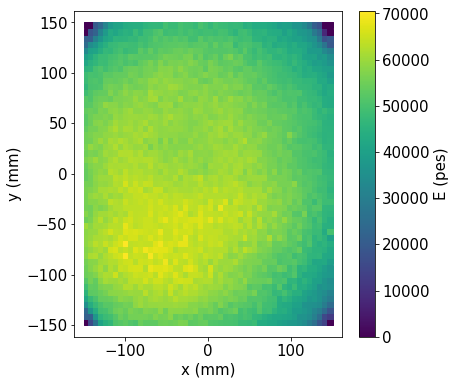

In [244]:
x_ = np.repeat(x, x.size)
y_ = np.tile  (y, y.size)
E_ = E.flatten()
plt.scatter(x_, y_, c=E_, marker="s")
cb = plt.colorbar()
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

In [245]:
mxy = MapXY(x, y, E)

reference energy = 59078.55638734054


In [246]:
Ecf  = fidxy.S2e.values * zcorr(fidxy.Z.values) * mxy.xycorr(fidxy.X.values, fidxy.Y.values)

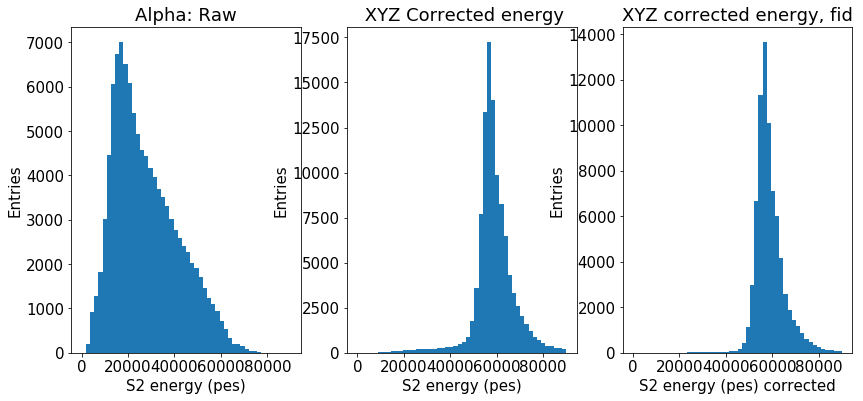

In [247]:
figsize=(14,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 3, 1)
plt.hist(full.S2e, 50, (0e3,9e4))
labels("S2 energy (pes)", "Entries")
plt.title('Alpha: Raw')

ax = plt.subplot(1, 3, 2)
plt.hist(Ec, 50, (0e3,9e4))
labels("S2 energy (pes)", "Entries")
plt.title(' XYZ Corrected energy')

ax = plt.subplot(1, 3, 3)
plt.hist(Ecf, 50, (0e3,9e4))
labels("S2 energy (pes) corrected", "Entries")
plt.title('XYZ corrected energy, fid')

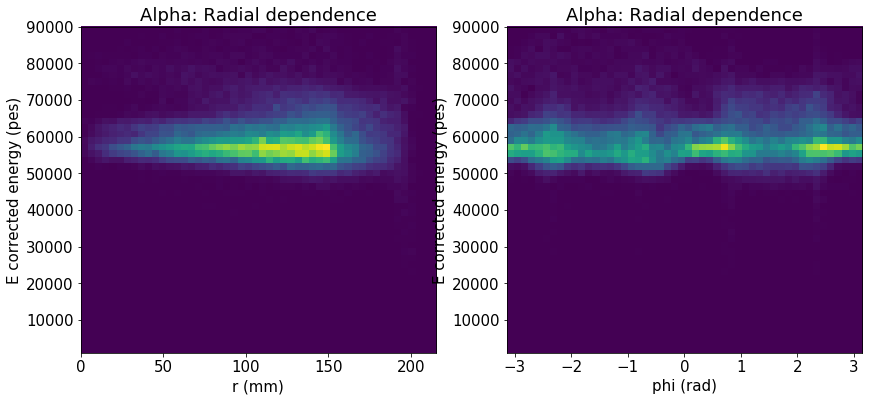

In [248]:
rrange =   0, 215
prange =   -pi, pi
Erange = 1e+3, 90e3
nbins = 50
figsize=(14,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 2, 1)
plt.hist2d(fidxy.R, Ecf, (nbins, nbins), range=(rrange, Erange), weights=Ecf)
labels("r (mm)", "E corrected energy (pes)")
plt.title('Alpha: Radial dependence')

ax = plt.subplot(1, 2, 2)
plt.hist2d(fidxy.Phi, Ecf, (nbins, nbins), range=(prange, Erange), weights=Ecf)
labels("phi (rad)", "E corrected energy (pes)")
plt.title('Alpha: Radial dependence')

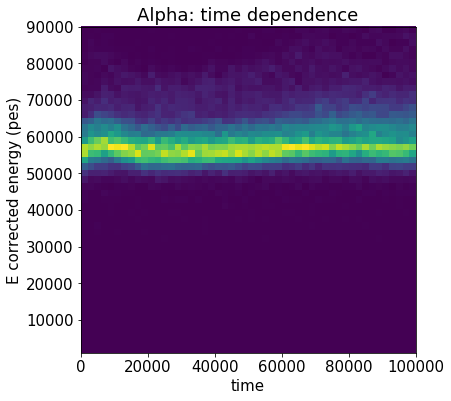

In [249]:
trange =   0, 1e+5

Erange = 1e+3, 90e3
nbins = 50
figsize=(6,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 1, 1)
plt.hist2d(fidxy.time.index, Ecf, (nbins, nbins), range=(trange, Erange), weights=Ecf)
labels("time", "E corrected energy (pes)")
plt.title('Alpha: time dependence')

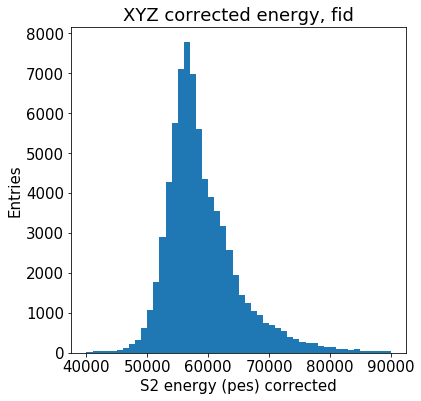

In [250]:
Erange = 40e+3, 90e3
figsize=(6,6)
plt.figure(figsize=figsize)

ax = plt.subplot(1, 1, 1)
plt.hist(Ecf, 50, Erange)
labels("S2 energy (pes) corrected", "Entries")
plt.title('XYZ corrected energy, fid')

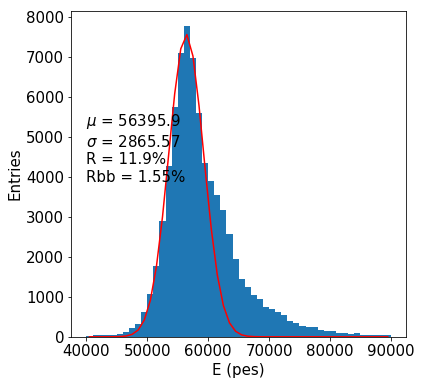

In [251]:
y, x, _ = hist(Ecf, 50, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e6, 60e3, 5e2), fit_range=(55e+3,60e+3))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f))

labels("E (pes)", "Entries")
